In [1]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Anchor boxes as defined in configs/test_anchors/base.py

feature_sizes=[[32, 256], [16, 128], [8, 64], [4, 32], [2, 16], [1, 8]]
# Strides is the number of pixels (in image space) between each spatial position in the feature map
strides=[[4, 4], [8, 8], [16, 16], [32, 32], [64, 64], [128, 128]]
min_sizes=[[16, 16], [32, 32], [48, 48], [64, 64], [86, 86], [128, 128], [128, 400]]
# Strides is the number of pixels (in image space) between each spatial position in the feature map
# aspect ratio is defined per feature map (first index is largest feature map (38x38))
# aspect ratio is used to define two boxes per element in the list.
# if ratio=[2], boxes will be created with ratio 1:2 and 2:1
# Number of boxes per location is in total 2 + 2 per aspect ratio
aspect_ratios=[[2], [2, 3], [2, 3], [2, 3], [2], [2]]
image_shape = (128, 1024),
scale_center_variance=0.1,
scale_size_variance=0.2

In [3]:
def calculate_boxes(min_size, next_min_size, aspect_ratio):
    print("min_size: ", min_size)
    print("next_min_size: ", next_min_size)
    print("aspect_ratio: ", aspect_ratio)
    boxes = []
    boxes.append((min_size[0], min_size[0]))
    print((min_size[0], min_size[0]))
    a = int(sqrt(min_size[0]*next_min_size[0]))
    boxes.append((a,a))
    print((a,a))
    for i, ar in enumerate(aspect_ratio):
        a = int(min_size[0]*sqrt(ar))
        b = int(min_size[0]/sqrt(ar))
        print((a,b))
        print((b,a))
        boxes.append((a,b))
        boxes.append((b,a))
    areas = []
    aspects = []
    for box in boxes:
        if box[0] <= 128 and box[1] <= 1024:
            areas.append(box[0]*box[1])
            aspects.append(box[0]/box[1])
    print(" ")
    return (areas, aspects, boxes)

def calculate_all_boxes(min_sizes, aspect_ratios):
    areas = []
    aspects = []
    boxes = []
    for i in range(6):
        min_size = min_sizes[i]
        next_min_size = min_sizes[i+1]
        aspect_ratio = aspect_ratios[0]
        ar, asp, box = calculate_boxes(min_size, next_min_size, aspect_ratio)
        areas = areas + ar
        aspects = aspects + asp
        boxes = boxes + box
    return (areas, aspects, boxes)

In [4]:
def area_hist(areas, title, end=4500):
    start = 0
    n = 100

    bins = np.linspace(start, end, n)

    plt.figure(figsize=(8, 6))

    plt.hist(areas, bins, alpha=0.5)
    plt.ylabel('Frequency',size=17)
    plt.title(title, fontdict={"fontsize": 20})
    plt.yticks(size=14)
    plt.tight_layout()
    plt.savefig(title.replace(" ", "_") + ".pdf")

def aspect_hist(aspects, title, end=2.5):
    start = 0
    n = 100

    bins = np.linspace(start, end, n)

    plt.figure(figsize=(8, 6))

    plt.hist(aspects, bins, alpha=0.5)
    plt.ylabel('Frequency',size=17)
    plt.title(title, fontdict={"fontsize": 20})
    plt.yticks(size=14)
    plt.xticks([0, 0.5, 1, 1.5, 2, 2.5],
           ['', '1:2', '1:1', '3:2', '2:1', '5:2'], size=14)
    plt.tight_layout()
    plt.savefig(title.replace(" ", "_") + ".pdf")

min_size:  [16, 16]
next_min_size:  [32, 32]
aspect_ratio:  [2]
(16, 16)
(22, 22)
(22, 11)
(11, 22)
 
min_size:  [32, 32]
next_min_size:  [48, 48]
aspect_ratio:  [2]
(32, 32)
(39, 39)
(45, 22)
(22, 45)
 
min_size:  [48, 48]
next_min_size:  [64, 64]
aspect_ratio:  [2]
(48, 48)
(55, 55)
(67, 33)
(33, 67)
 
min_size:  [64, 64]
next_min_size:  [86, 86]
aspect_ratio:  [2]
(64, 64)
(74, 74)
(90, 45)
(45, 90)
 
min_size:  [86, 86]
next_min_size:  [128, 128]
aspect_ratio:  [2]
(86, 86)
(104, 104)
(121, 60)
(60, 121)
 
min_size:  [128, 128]
next_min_size:  [128, 400]
aspect_ratio:  [2]
(128, 128)
(128, 128)
(181, 90)
(90, 181)
 


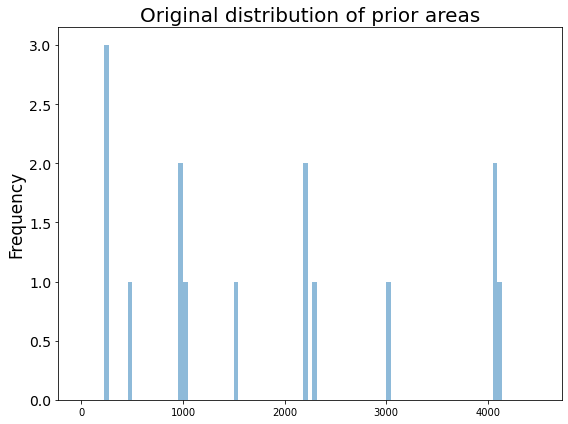

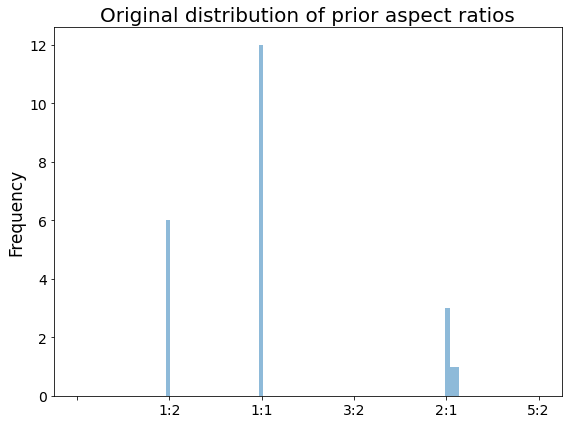

In [5]:
# Calculate distribution of box areas and aspect ratios for data in Tasks 2.1-2.3
areas, aspects, boxes = calculate_all_boxes(min_sizes, aspect_ratios)
area_hist(areas=areas, title="Original distribution of prior areas")
aspect_hist(aspects=aspects, title="Original distribution of prior aspect ratios")

min_size:  [8, 8]
next_min_size:  [16, 16]
aspect_ratio:  [3, 5]
(8, 8)
(11, 11)
(13, 4)
(4, 13)
(17, 3)
(3, 17)
 
min_size:  [16, 16]
next_min_size:  [32, 32]
aspect_ratio:  [3, 5]
(16, 16)
(22, 22)
(27, 9)
(9, 27)
(35, 7)
(7, 35)
 
min_size:  [32, 32]
next_min_size:  [48, 48]
aspect_ratio:  [3, 5]
(32, 32)
(39, 39)
(55, 18)
(18, 55)
(71, 14)
(14, 71)
 
min_size:  [48, 48]
next_min_size:  [86, 86]
aspect_ratio:  [3, 5]
(48, 48)
(64, 64)
(83, 27)
(27, 83)
(107, 21)
(21, 107)
 
min_size:  [86, 86]
next_min_size:  [128, 128]
aspect_ratio:  [3, 5]
(86, 86)
(104, 104)
(148, 49)
(49, 148)
(192, 38)
(38, 192)
 
min_size:  [128, 128]
next_min_size:  [128, 400]
aspect_ratio:  [3, 5]
(128, 128)
(128, 128)
(221, 73)
(73, 221)
(286, 57)
(57, 286)
 


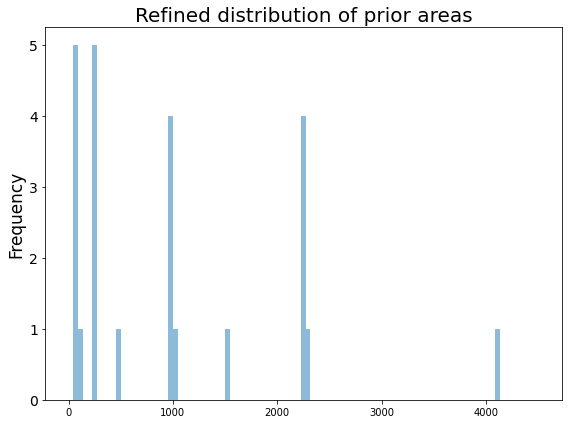

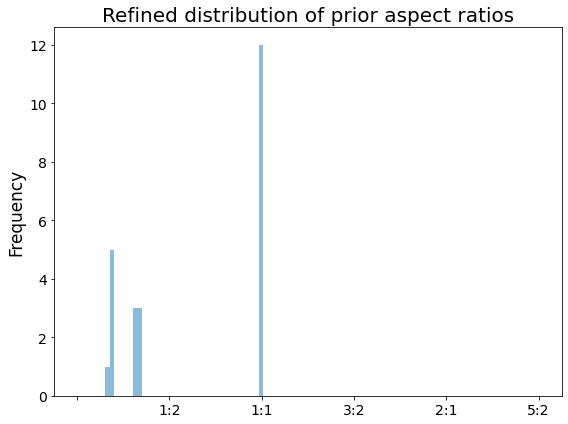

In [6]:
# Calculate distribution of box areas and aspect ratios with new boxes

# Old ones
# min_sizes=[[16, 16], [32, 32], [48, 48], [64, 64], [86, 86], [128, 128], [128, 400]]
# aspect_ratios=[[2], [2, 3], [2, 3], [2, 3], [2], [2]]
min_sizes=[[8, 8], [16, 16], [32, 32], [48, 48], [86, 86], [128, 128], [128, 400]]
aspect_ratios=[[3,5], [3,5], [2,4], [2,4], [2,3], [2,3]]

areas, aspects, boxes = calculate_all_boxes(min_sizes, aspect_ratios)
area_hist(areas=areas, title="Refined distribution of prior areas")
aspect_hist(aspects=aspects, title="Refined distribution of prior aspect ratios")